# Business in Chorrera, an aglommerative of people in Panama Oeste.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business approach in La Chorrera<a name="introduction"></a>

#### The Republic of Panama is a small country and the center of all the business is done in the capital: Panama City. 
There has been big efforts to reduce people density in Panama City, but the "solutions" has only made it worse, because people don't want to leave Panama. 

In the recent years Panama (province) was divided into Panama and "Panama Oeste", the second one was a formalization to the density of people that live in there, but it doesn't mean that people actually spend their days working in there. In fact, every morning there are several traffic jams from Panama Oeste to Panama, because there are not enoguh jobs in Panama Oeste. Also, people tend to come to the capital in order to distract themselves at bars, clubs, restaurants,cafes, malls and recreational places.

## How come to be that in a region with a big ammount of people there are just smalls business and franchises but their people don't consume in there? Why do they prefer to go to the capital?

In this project I'll be looking at the differences between the four cities in the Republic of Panama.
This will be done in order to determine what kind of business atract people in Panama comparing a city which is already full (Panama), a city that has a moderate population density being on the other side of the country (David),a City that is based on services activities with a fair amount of people in it (Colon) and a city with a high population density that doesn't have high attractiveness.

## Data <a name="data"></a>

## Datasets that will be used during this project.

I'll use some datasets provided by the **INEC** (National institute of statistics and census). 

The first type of dataset is related to the construction made by the private sector during the last 3 years. In it will be used to analyze the growth of the private sector in the cities mentioned above. The link to the dataset is as follows: 

1.[INEC construction January 2018-2019](https://www.inec.gob.pa/archivos/A0705547520200131133335Difusi%C3%B3n%20de%20Construcci%C3%B3n%20enero-diciembre%202019.pdf) 

2.[INEC construction January 2017-2018](https://www.inec.gob.pa/archivos/A121Difusi%C3%B3n%20de%20Construcci%C3%B3n%20enero-diciembre%202018.pdf)

3.[INEC construction January 2016-2017](https://www.inec.gob.pa/archivos/A121Construcci%C3%B3n%20de%20diciembre%202016.pdf)

Also if a **xls** version is needed it can be downaloded trough this site : [INEC](https://www.inec.gob.pa/avance/Default2.aspx?ID_CATEGORIA=2&ID_CIFRAS=14&ID_IDIOMA=1)

#### Dataset used to corroborate the population denstity: [Popoulation density by year and province](https://www.inec.gob.pa/archivos/P8821012-05.xls)

So with the previous information and the help of the **Foursquare API** I will explore the  venues in each city and determine what kind of place is more visited by the panamanian in order to give recommendations for a new type of business around "La Chorrera" 

So, in order to gather Foursquare information from the nearby avenues I will address the most populars boroughs of every city to be taken in consideration [Dataset for the different boroughs in provinces](https://es.wikipedia.org/wiki/Anexo:Corregimientos_de_Panam%C3%A1)

## Methodology <a name="methodology"></a>

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('Construcción enero a diciembre 2017.xls',skiprows=11)

#### The dataset is imported but the data is really confusing so the next step is to obtain the values for the numbers of construction that are related to residentials by years (Num_res, Num_res17 and so on)

In [3]:
#making a dataframe with the residential construction information from 2016 to 2018
df_res= df[['Unnamed: 0','Num_res','Num_res17',"Num_res18"]]
df_res0= df_res.rename(columns={"Unnamed: 0": "Borough","Num_res":"2016","Num_res17":"2017","Num_res18":"2018"})

In [4]:
df_res0

,Borough,2016,2017,2018
0,Aguadulce,348,332,241
1,Arraiján,2439,2414,2078
2,Colón,86,91,88
3,Chitré,528,537,549
4,David,1020,730,782
5,La Chorrera,3276,6366,2157
6,Panamá,1876,4004,3503
7,Santiago,995,932,739


In [5]:
df_res=df_res0.set_index('Borough')

In [6]:
df_res= df_res.transpose()

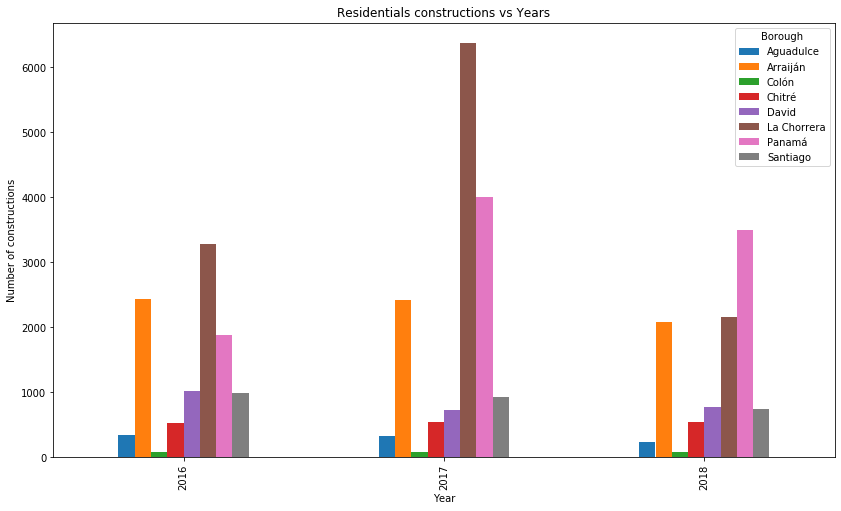

In [7]:
df_res.index = df_res.index.map(int)
df_res.plot(kind='bar', figsize=(14, 8))
plt.title('Residentials constructions vs Years')
plt.ylabel('Number of constructions')
plt.xlabel('Year')
plt.show()

It is really easy to see that "La chorrera" has a big ammount of residential construction through the years, and even surpass Panama city in residentials at one point. So now let's check the construction numbers for non residential project (new or expanding businesses)

In [8]:
#Cleaning the data for a dataframe just with the non residential constructions
df_nores = df[['Unnamed: 0','Num_n','Num_n17',"Num_n18"]]
df_nores= df_nores.rename(columns={"Unnamed: 0": "Borough","Num_n":"2016","Num_n17":"2017","Num_n18":"2018"})
df_nores

,Borough,2016,2017,2018
0,Aguadulce,15,12,11
1,Arraiján,57,40,42
2,Colón,20,29,32
3,Chitré,17,12,12
4,David,30,40,38
5,La Chorrera,26,40,40
6,Panamá,109,127,93
7,Santiago,20,23,32


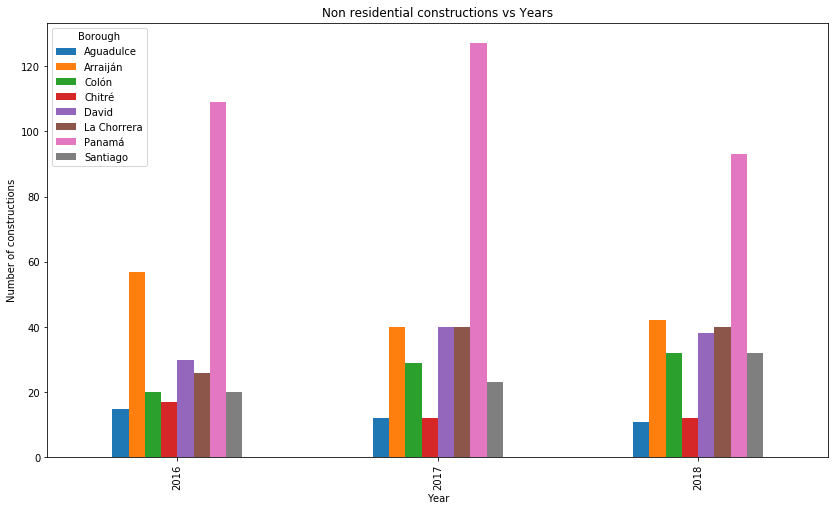

In [9]:
df_nores=df_nores.set_index('Borough')
df_nores= df_nores.transpose()
df_nores.index = df_nores.index.map(int)
df_nores.plot(kind='bar', figsize=(14, 8))
plt.title('Non residential constructions vs Years')
plt.ylabel('Number of constructions')
plt.xlabel('Year')
plt.show()

#### According to the graphics shown above we can conclude that, even though La Chorrera has a high increse in residential construction, it doesn't go with the amount of jobs that are pressented in that borough.
And thats why this happens during weekdays.

![Traffic jam from La Chorrera to Panama City.](https://www.diaadia.com.pa/sites/default/files/filefield_paths/tranque_panama_oeste_2.jpg)
### It is visible that even with the reversed lane the traffic is pretty heavy.
#### And that's just considering the amount of people that have moved to La Chorrera because there no more space in Panama City. Finally a dataset of the population per borough to understand the small amount of people that is part of this traffic jam.

In [10]:
Censo = pd.read_excel('Censo.xlsx',skiprows=5)
Censo

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,REPÚBLICA,4158783.0,2085950.0,2072833.0
1,NaN,NaN,NaN,NaN
2,Bocas del Toro,170320.0,86978.0,83342.0
3,NaN,NaN,NaN,NaN
4,Bocas del Toro,20881.0,10936.0,9945.0
...,...,...,...,...
118,Santa Catalina o Calovébora (Bledeshia),7819.0,3850.0,3969.0
119,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN
121,Fuente: Estimaciones y Proyecciones de la ...,NaN,NaN,NaN


In [11]:
Censo.dropna(axis=0,inplace=True)

In [12]:
Censo= Censo[['Unnamed: 0','Unnamed: 1']]
Censo= Censo.rename(columns={"Unnamed: 0": "Borough","Unnamed: 1":"Total of people"})

In [13]:
Censo.head()

,Borough,Total of people
0,REPÚBLICA,4158783.0
2,Bocas del Toro,170320.0
4,Bocas del Toro,20881.0
5,Changuinola,103933.0
6,Chiriquí Grande,14118.0


So now we have a dataframe with the population number and others with private constructions.
In the population df there are some rows that are not presented in the df with private constructions, these will be dropped.

In [14]:
Censo= Censo.set_index('Borough')

In [15]:
Censo

,Total of people
Borough,
REPÚBLICA,4158783.0
Bocas del Toro,170320.0
Bocas del Toro,20881.0
Changuinola,103933.0
Chiriquí Grande,14118.0
...,...
Ñürüm,17897.0
Kankintú,24651.0
Kusapín,21602.0


In [16]:
ls = df_res0['Borough']
ls

0      Aguadulce
1       Arraiján
2          Colón
3         Chitré
4          David
5    La Chorrera
6         Panamá
7       Santiago
Name: Borough, dtype: object

In [17]:
Censo = Censo.loc[ls]
Censo

,Total of people
Borough,
Aguadulce,51286.0
Arraiján,289846.0
Colón,249529.0
Chitré,56344.0
David,170511.0
La Chorrera,196610.0
Panamá,1162673.0
Santiago,99360.0


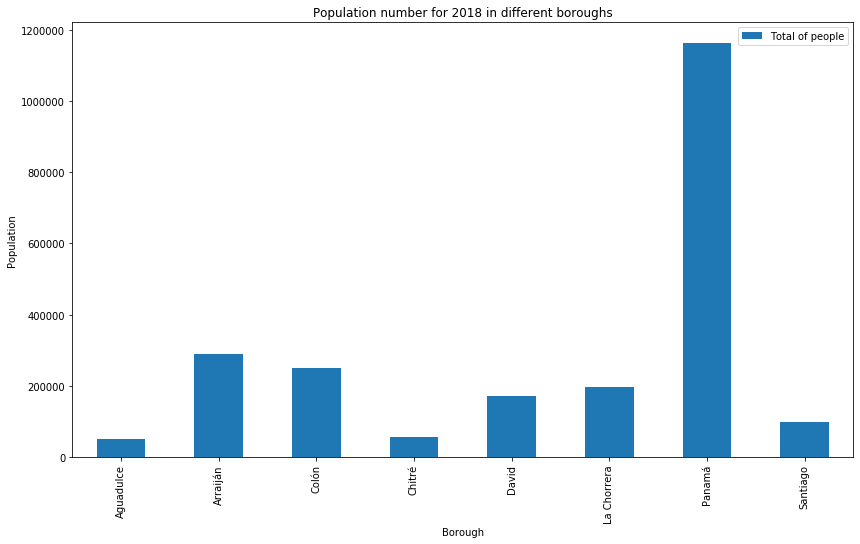

In [18]:
Censo.transpose()
Censo.index = Censo.index.map(str)
Censo.plot(kind='bar', figsize=(14, 8))
plt.title('Population number for 2018 in different boroughs')
plt.ylabel('Population')
plt.xlabel('Borough')
plt.show()

So analyzing the 3 graphs we can conclude that there's a high number of people that live in Chorrera, but doesn't work there because theres barely any business to work on at that Borough or in the near locations.
#### This leads us to analyze the venues between some of the Boroughs. As detailed in the Data Section the Borough to be studied are going to be: David, Panama, La Chorrera and Colon in order to cluster some of the tendencies that panamanian people tend to like and recommend what typeof business could work for Chorrera.

#### First lets create a Dataframe with four cities and explore them with foursquare

In [19]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium

#### After some test the coordinates obtained from geolocator had not been the best so I had to look up for them.

#### Import credentials for foursquare 


In [37]:
CLIENT_ID = 'NX5SE4M34VNRXKPPEUWLVAL4DOM0JTIH45ZOIHW4NILSTVRQ' # your Foursquare ID
CLIENT_SECRET = 'HYDZZVBOJR0NLFDUBW3Q2KW00KGXJ1IW5GVGANQIMKY1JSQQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
import requests 

Lets create a dataset that cointains all the data related to venues according foursquare

In [38]:
#Panama City
lat= 9
lng=-79.5
radius=1000
Limit =200
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
results = requests.get(url).json()

In [39]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [61]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
Panama_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Panama_venues =Panama_venues.loc[:, filtered_columns]

# filter the category for each row
Panama_venues['venue.categories'] = Panama_venues.apply(get_category_type, axis=1)

# clean columns
Panama_venues.columns = [col.split(".")[-1] for col in Panama_venues.columns]

Panama_venues=Panama_venues.groupby('categories').apply(lambda x: x.count())
Panama_venues=Panama_venues.drop(columns=['name', 'lat','lng'],axis=0)
Panama_venues=Panama_venues.rename(columns={'categories':'Panama'})
Panama_venues=Panama_venues.sort_values(by='Panama',ascending=False)
Panama_venues

/home/electrokai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,Panama
categories,
Bakery,5
Italian Restaurant,4
Gym,4
Coffee Shop,3
Ice Cream Shop,3
Fast Food Restaurant,3
Pet Store,2
Restaurant,2
Grocery Store,2


##### Now I'll be repeating the same process for the other cities, so the df won't be displayed.

In [27]:
#Chorrera 
lat= 8.880278
lng=-79.783333
radius=1000
Limit =200
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
results = requests.get(url).json()
C_venues = results['response']['groups'][0]['items']
    
Chorrera_venues = json_normalize(C_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Chorrera_venues =Chorrera_venues.loc[:, filtered_columns]

# filter the category for each row
Chorrera_venues['venue.categories'] = Chorrera_venues.apply(get_category_type, axis=1)

# clean columns
Chorrera_venues.columns = [col.split(".")[-1] for col in Chorrera_venues.columns]
Chorrera_venues=Chorrera_venues.groupby('categories').apply(lambda x: x.count())
Chorrera_venues=Chorrera_venues.drop(columns=['name', 'lat','lng'],axis=0)
Chorrera_venues=Chorrera_venues.rename(columns={'categories':'Chorrera'})
Chorrera_venues=Chorrera_venues.sort_values(by='Chorrera',ascending=False)

/home/electrokai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,Chorrera
categories,
Pizza Place,2
Park,2
Latin American Restaurant,2
Food,1
Mediterranean Restaurant,1
Furniture / Home Store,1
Food Truck,1
Food & Drink Shop,1
American Restaurant,1


In [28]:
#David 
lat= 8.433333
lng= -82.433333
radius=1000
Limit =200
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
results = requests.get(url).json()
D_venues = results['response']['groups'][0]['items']
    
David_venues = json_normalize(D_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
David_venues =David_venues.loc[:, filtered_columns]

# filter the category for each row
David_venues['venue.categories'] = David_venues.apply(get_category_type, axis=1)

# clean columns
David_venues.columns = [col.split(".")[-1] for col in David_venues.columns]
David_venues=David_venues.groupby('categories').apply(lambda x: x.count())
David_venues=David_venues.drop(columns=['name', 'lat','lng'],axis=0)
David_venues=David_venues.rename(columns={'categories':'David'})
David_venues=David_venues.sort_values(by='David',ascending=False)

/home/electrokai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,David
categories,
Hotel,6
Ice Cream Shop,3
Steakhouse,2
Latin American Restaurant,2
Burger Joint,2
BBQ Joint,2
Casino,2
Chinese Restaurant,2
Coffee Shop,2


In [31]:
#Colon
lat= 9.347195
lng=-79.888963
radius=1000
Limit =200
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
results = requests.get(url).json()
Co_venues = results['response']['groups'][0]['items']
    
Colon_venues = json_normalize(Co_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Colon_venues =Colon_venues.loc[:, filtered_columns]

# filter the category for each row
Colon_venues['venue.categories'] = Colon_venues.apply(get_category_type, axis=1)

# clean columns
Colon_venues.columns = [col.split(".")[-1] for col in Colon_venues.columns]
Colon_venues=Colon_venues.groupby('categories').apply(lambda x: x.count())
Colon_venues=Colon_venues.drop(columns=['name', 'lat','lng'],axis=0)
Colon_venues=Colon_venues.rename(columns={'categories':'Colon'})
Colon_venues=Colon_venues.sort_values(by='Colon',ascending=False)

/home/electrokai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,Colon
categories,
Restaurant,3
Shopping Mall,2
Burger Joint,1
Business Service,1
Cafeteria,1
Duty-free Shop,1
Electronics Store,1
Fried Chicken Joint,1
Hotel,1


Now lets concatenate all the datasets into one and apply the machine learning algorithm selected to asociate the cities that are alike and see if Chorrera can satisfy the same needs as Panama City.

In [76]:
grouped_venues=pd.concat([Colon_venues, David_venues,Chorrera_venues,Panama_venues], axis=1, sort=False)

In [80]:
grouped_venues=grouped_venues.sort_values(by=['Chorrera'],ascending=False,na_position='last')
grouped_venues=grouped_venues.drop(columns='venue.categories')

KeyError: "['venue.categories'] not found in axis"

In [88]:
grouped_venues.head(20)

,Colon,David,Chorrera,Panama
Pizza Place,1.0,2.0,2.0,1.0
Latin American Restaurant,0.0,2.0,2.0,1.0
Park,0.0,0.0,2.0,2.0
Food,0.0,0.0,1.0,0.0
Asian Restaurant,0.0,1.0,1.0,0.0
Mediterranean Restaurant,0.0,1.0,1.0,0.0
Beer Garden,0.0,1.0,1.0,1.0
Bar,0.0,1.0,1.0,0.0
Bakery,0.0,1.0,1.0,5.0
Food Truck,0.0,0.0,1.0,0.0


In [87]:
grouped_venues=grouped_venues.fillna(0)

### The data set had been sorted in descending order and leaving NaN data to be the last in Chorrera, so in comparison to Panama we can see that Chorrera doesn't have as much venues neither the same categories as Panama.
#### So lets try to use hierarchical clustering to pair these cities and try to see what kind of venues can grow in Chorrera.

## Results and Discussion <a name="results"></a>

### The Hierarchical Clustering will be used as machine learning algorithm to suggest what kind of business/venue might be good to open in Chorrera.

Imported the libs needed and defined the distance matrix in order to agglomerate the clusters depending on the venues and Cities

In [132]:
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.33333333 0.51207638 ... 1.1055416  1.1055416  1.1055416 ]
 [0.33333333 0.         0.38873013 ... 1.05409255 1.05409255 1.05409255]
 [0.51207638 0.38873013 0.         ... 1.0198039  1.0198039  1.0198039 ]
 ...
 [1.1055416  1.05409255 1.0198039  ... 0.         0.         0.        ]
 [1.1055416  1.05409255 1.0198039  ... 0.         0.         0.        ]
 [1.1055416  1.05409255 1.0198039  ... 0.         0.         0.        ]]


In [133]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 0, 3, 3,
       3, 3, 3, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [134]:
grouped_venues['cluster_'] = agglom.labels_
grouped_venues.head(25)

,Colon,David,Chorrera,Panama,cluster_
Pizza Place,1.0,2.0,2.0,1.0,1
Latin American Restaurant,0.0,2.0,2.0,1.0,1
Park,0.0,0.0,2.0,2.0,1
Food,0.0,0.0,1.0,0.0,1
Asian Restaurant,0.0,1.0,1.0,0.0,1
Mediterranean Restaurant,0.0,1.0,1.0,0.0,1
Beer Garden,0.0,1.0,1.0,1.0,1
Bar,0.0,1.0,1.0,0.0,1
Bakery,0.0,1.0,1.0,5.0,2
Food Truck,0.0,0.0,1.0,0.0,1


Here are shown the different clusters that have been done for the venues according to the cities.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Cluster')

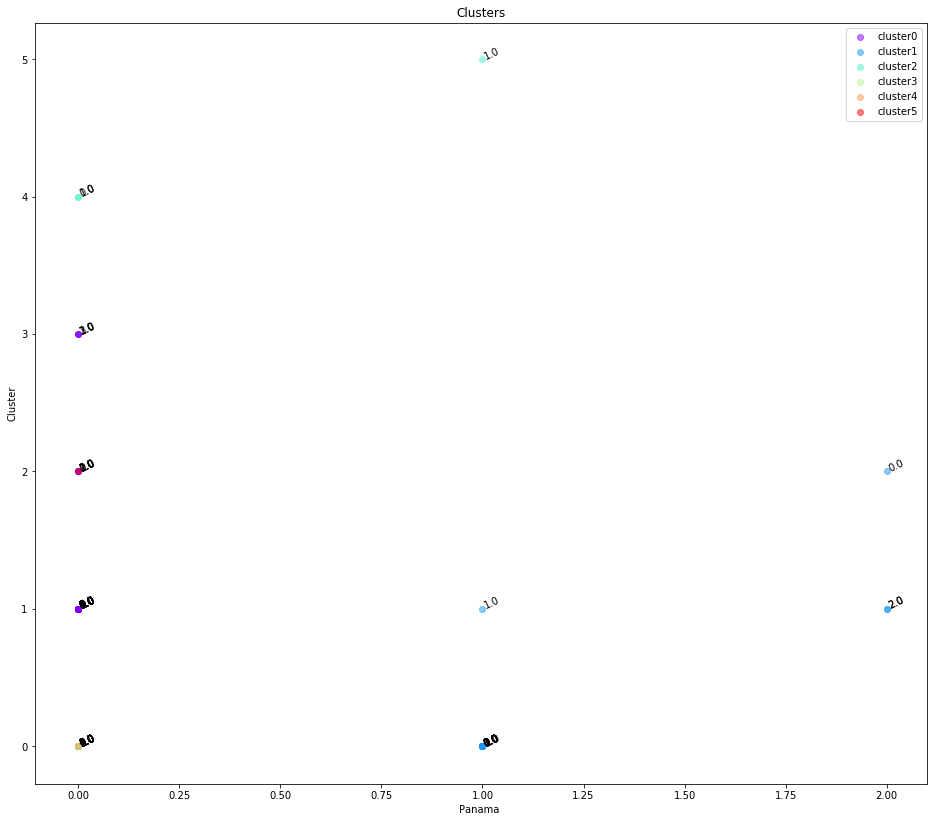

In [138]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = grouped_venues[grouped_venues.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Chorrera[i], subset.Panama[i],str(subset['David'][i]), rotation=25) 
    plt.scatter(subset.Chorrera, subset.Panama, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Panama ')
plt.ylabel('Cluster')

### By exploring the dataset and comparing with the graph we can see that there's a categorie that is in 3 cities except Chorrera, "Restaurants" is part of the cluster and it referes to uniques restaurants.

#### Taking comments from friends around the Country I can admit that this was true a year ago, right now Chorrera has been expanding its categories according to venues, because it isnt' monopolyzed by a mall called "Costa Verde" so it's likelly that the dataset from foursquare has not been up to date. Personally, I didn't hear about it until this course, since in Panama, Maps, degusta and tripadvisor are some of the mayor apps used to rate venues.

## Conclusion <a name="conclusion"></a>

#### **This project lead to conclude that Chorrera didn't have enough unique venues in it's nearbys, but over the last year it has grown pretty fast, meaning that the model is accurate according to the data provided. Even if Chorrera is growing in venues, it doesn't mean that the people won't go to Panama city anymore since Panama City has the better assets for jobs and education, but at least the city of Chorrera is growing and expansion is tangible.**